## Problem Statement

A US bike-sharing provider BoomBikes wants to understand the factors on which
the demand for shared bikes in the American market.

The company wants to know:
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

## Strategy

1. Data Understanding/Cleaning
2. Data Visualisation
3. Determine, whether it makes sense to perfrom linear regression model.
4. Data Preparation for Modelling (Linear regression)
6. Data Modelling and Evaluation

## Importing Required Python Pakages

In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Data Understanding/Cleaning

In [2]:
#import bike data
bike = pd.read_csv("day.csv")
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Data Dictionary
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
# Checking null values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null values.

### Dropping below columns as they are not needed for analysis.
1. instant - As it is just a index, not needed for analysis.
2. dteday - We are not predicting the demand over time. We are only interested in factors affecting demand. Hence, dropping it.
3. casual and registered - We are not analysing demand of regestered users vs un-regestered users. Hence, dropping.
4. atemp - temp and atemp are kind of same data. We can keep only once to check the affect of temperature on demand.

<AxesSubplot:xlabel='temp', ylabel='atemp'>

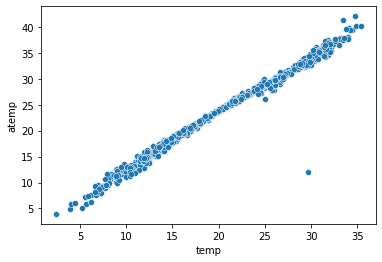

In [4]:
sns.scatterplot(x='temp',y='atemp',data=bike)

In [5]:
#Dropping un-wanted columns
bikes = bike.drop(['instant','dteday','casual','registered','atemp'],axis=1)

In [6]:
bikes.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [7]:
#understanding distribution values of categorical columns are as per data disctionary
cat_columns=['season','yr','mnth','holiday','weekday','workingday','weathersit']

for col in cat_columns:
    print(bikes[col].value_counts()/len(bikes)*100)
    print()

3    25.753425
2    25.205479
1    24.657534
4    24.383562
Name: season, dtype: float64

1    50.0
0    50.0
Name: yr, dtype: float64

12    8.493151
10    8.493151
8     8.493151
7     8.493151
5     8.493151
3     8.493151
1     8.493151
11    8.219178
9     8.219178
6     8.219178
4     8.219178
2     7.671233
Name: mnth, dtype: float64

0    97.123288
1     2.876712
Name: holiday, dtype: float64

6    14.383562
1    14.383562
0    14.383562
5    14.246575
4    14.246575
2    14.246575
3    14.109589
Name: weekday, dtype: float64

1    68.356164
0    31.643836
Name: workingday, dtype: float64

1    63.424658
2    33.698630
3     2.876712
Name: weathersit, dtype: float64



In [8]:
#understanding continous variables - temp, hum, windspeed, cnt
bikes.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   20.319259   62.765175   12.763620  4508.006849  
std      0.544807    7.506729   14.237589    5.195841  1936.011647  
min      1.000000    2.424346    0.000000    1.500244    22.000000  
25%      1.000000   13.811885   52.000000    9.041650  3169.750000  
50%      1.000000   20.465826   62.625000   12.125325  4548.500000  
75%      2.000000   26.880615   72.989575   15.625589  5966.000000  
max      3.000000   35.328347   97.250000   34.000021  8714.000000

In [9]:
#imputing data as per categories
bikes['season']  = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes['yr'] = bikes['yr'].map({0: '2018', 1:'2019'})
bikes['mnth']  = bikes['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr',5:'may', 6:'jun', 7:'jul', 8:'aug',9:'sep', 10:'oct', 11:'nov', 12:'dec'})
bikes['weekday']  = bikes['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thur',5:'fri', 6:'sat'})
bikes['weathersit']  = bikes['weathersit'].map({1:'clear', 2:'mist', 3:'light', 4:'heavy'})

In [10]:
bikes.head()

season    yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring  2018  jan        0     sat           0       mist  14.110847   
1  spring  2018  jan        0     sun           0       mist  14.902598   
2  spring  2018  jan        0     mon           1      clear   8.050924   
3  spring  2018  jan        0     tue           1      clear   8.200000   
4  spring  2018  jan        0     wed           1      clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

cnt is the target variable for demand

## Univeriate Analysis

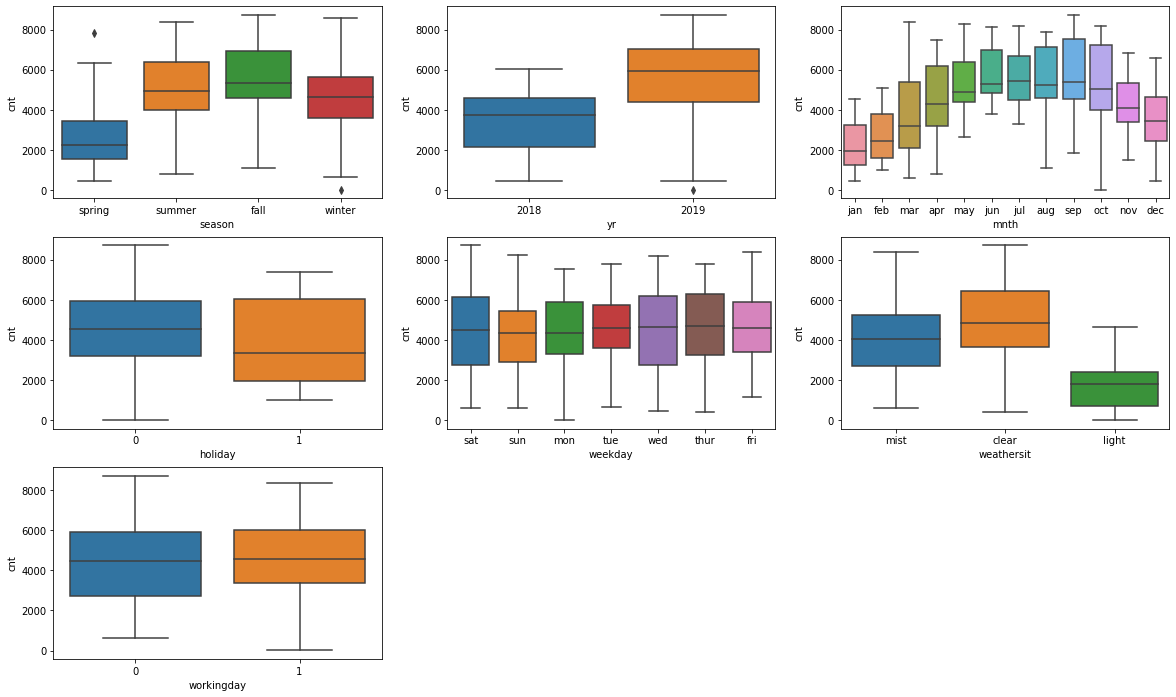

In [11]:
#Analysing categorical data:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.show()

## Take aways

1. Fall season has more demand.
2. 2019 Yr has more demand compared to 2018.
3. Non-holiday days has more demand.
4. Weather should be clear for demand.
5. Months(may to sep) has good demand compared to other months.
6. working days - Demandy is slightly more in nworking days.
7. Weekday - Could not get much correlation of demand with days.

<Figure size 1440x1440 with 0 Axes>

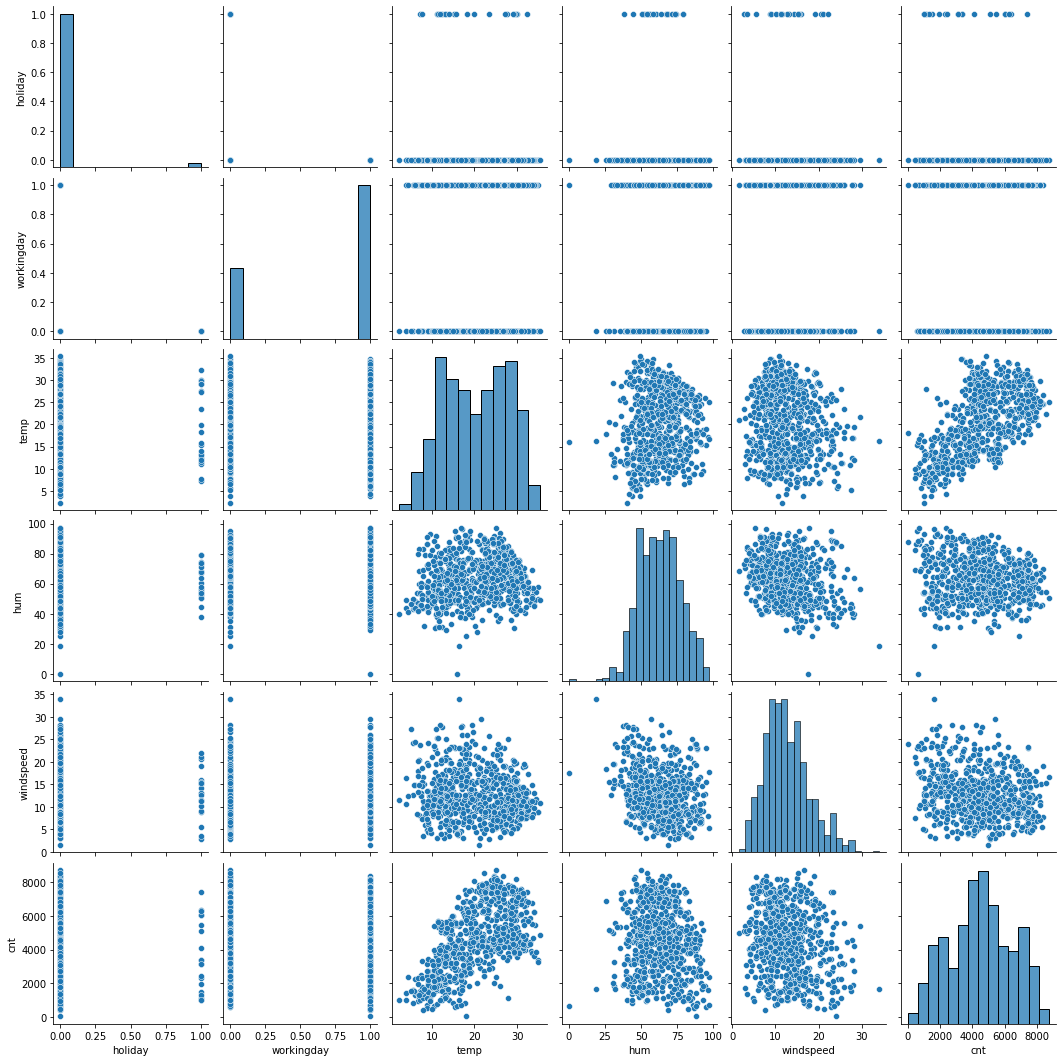

In [12]:
#Analysing linear relaitonship
plt.figure(figsize=(20, 20))
sns.pairplot(bikes)
plt.show()

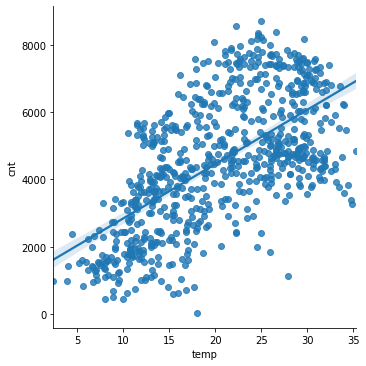

In [13]:
sns.lmplot(x='temp',y='cnt',data=bikes)
plt.show()

## temp is liearly corelated with cnt. Hence we can apply linear regression model.

## Bivariate Analysis

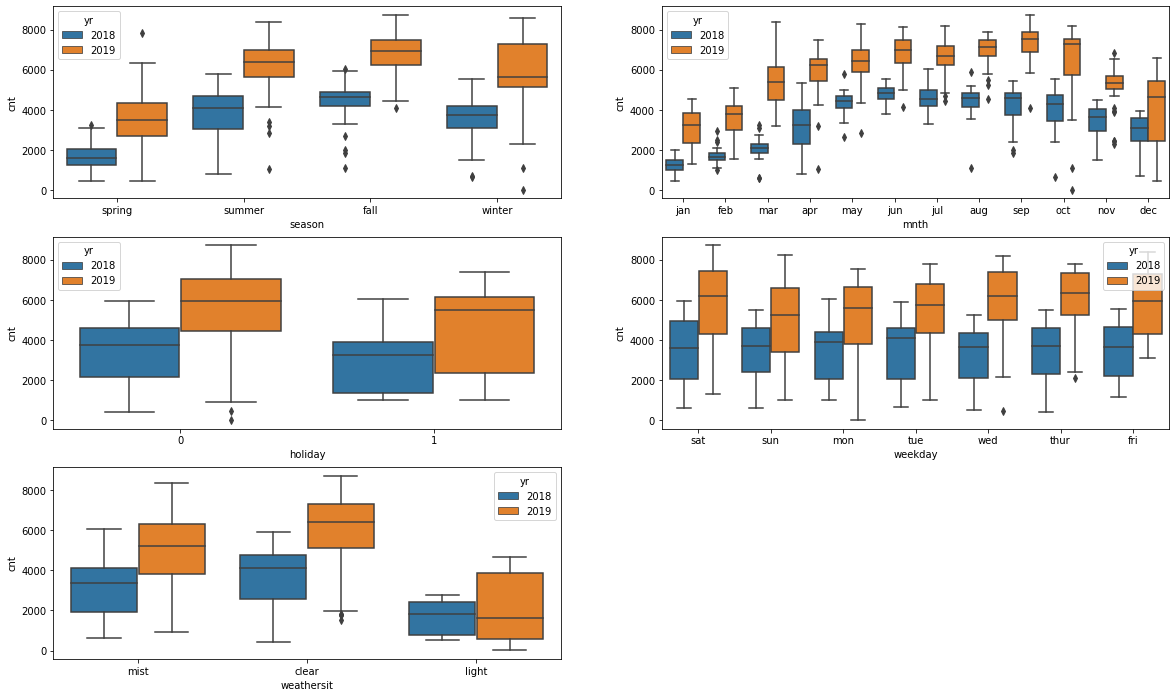

In [14]:
#Analysing 2018 vs 2019 demand:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', hue='yr', data = bikes)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', hue='yr',data = bikes)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', hue='yr',data = bikes)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', hue='yr',data = bikes)
plt.subplot(3,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', hue='yr',data = bikes)
plt.show()

In All parameters demand is clearly high for 2019

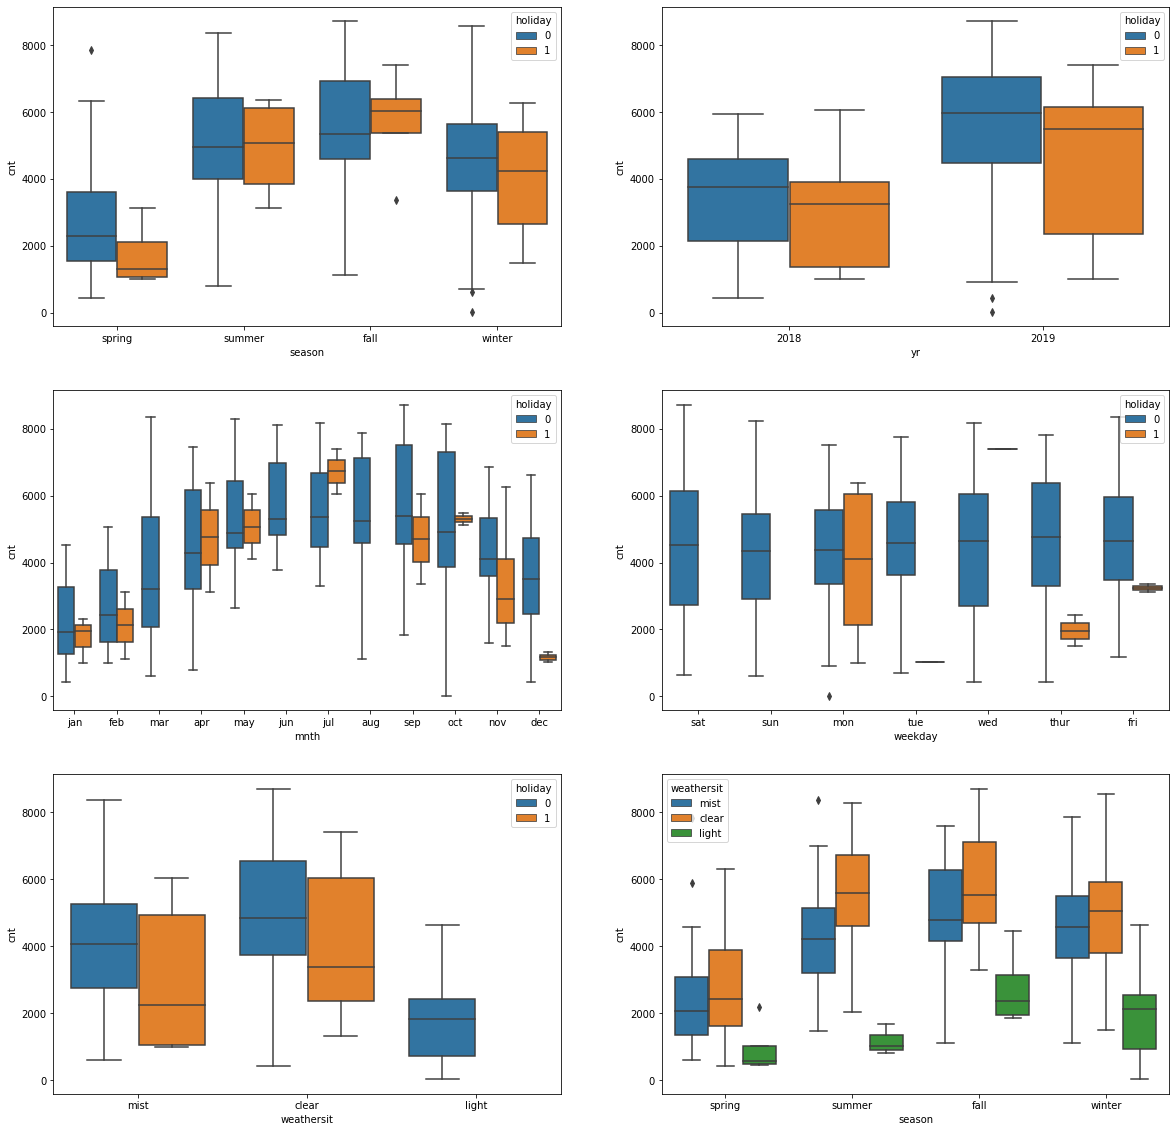

In [15]:
#Analysing categorical data:
plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt',hue='holiday',data=bikes)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt' ,hue='holiday', data = bikes)
plt.subplot(3,2,3)
sns.boxplot(x = 'mnth', y = 'cnt' ,hue='holiday', data = bikes)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', hue='holiday', data = bikes)
plt.subplot(3,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', hue='holiday', data = bikes)
plt.subplot(3,2,6)
sns.boxplot(x = 'season', y = 'cnt',hue='weathersit',data=bikes)
plt.show()

#### Takeayways:
    1. In all weathers, demand is higher in clear weather.
    2. Demand is more in non-holidays in all conditions.

## Data prepration for Linear regression

In [16]:
#Generate Dummy values
for col in ['season','mnth','weekday','weathersit']:
    dum = pd.get_dummies(bikes[col], drop_first = True)
    print(dum.columns)
    print()
    bikes = pd.concat([bikes, dum], axis = 1)
    bikes.drop([col], axis = 1, inplace = True)

Index(['spring', 'summer', 'winter'], dtype='object')

Index(['aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep'],
      dtype='object')

Index(['mon', 'sat', 'sun', 'thur', 'tue', 'wed'], dtype='object')

Index(['light', 'mist'], dtype='object')



In [17]:
#Correcting data for yr
bikes['yr'] = bikes['yr'].map({'2018': '0', '2019':1})

In [18]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    object 
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  aug         730 non-null    uint8  
 11  dec         730 non-null    uint8  
 12  feb         730 non-null    uint8  
 13  jan         730 non-null    uint8  
 14  jul         730 non-null    uint8  
 15  jun         730 non-null    uint8  
 16  mar         730 non-null    uint8  
 17  may         730 non-null    uint8  
 18  nov         730 non-null    uint8  
 19  oct         730 non-null    u

In [19]:
bikes.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0  0        0           0  14.110847  80.5833  10.749882   985       1   
1  0        0           0  14.902598  69.6087  16.652113   801       1   
2  0        0           1   8.050924  43.7273  16.636703  1349       1   
3  0        0           1   8.200000  59.0435  10.739832  1562       1   
4  0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  ...  oct  sep  mon  sat  sun  thur  tue  wed  light  mist  
0       0       0  ...    0    0    0    1    0     0    0    0      0     1  
1       0       0  ...    0    0    0    0    1     0    0    0      0     1  
2       0       0  ...    0    0    1    0    0     0    0    0      0     0  
3       0       0  ...    0    0    0    0    0     0    1    0      0     0  
4       0       0  ...    0    0    0    0    0     0    0    1      0     0  

[5 rows x 29 columns]

### Data divide  - training and testing

In [20]:
#Divide train and testing data
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Data Rescaling

In [22]:
#Instantiating scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
# scaling columns - temp, hum, windspeed, cnt
column_scale = ['temp', 'hum', 'windspeed', 'cnt']
df_train[column_scale] = scaler.fit_transform(df_train[column_scale])

In [24]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
653  1        0           1  0.509887  0.575354   0.300794  0.864243       0   
576  1        0           1  0.815169  0.725633   0.264686  0.827658       0   
426  1        0           0  0.442393  0.640189   0.255342  0.465255       1   
728  1        0           0  0.245101  0.498067   0.663106  0.204096       1   
482  1        0           0  0.395666  0.504508   0.188475  0.482973       0   

     summer  winter  ...  oct  sep  mon  sat  sun  thur  tue  wed  light  mist  
653       0       1  ...    1    0    0    0    0     0    1    0      0     0  
576       0       0  ...    0    0    0    0    0     0    1    0      0     0  
426       0       0  ...    0    0    0    1    0     0    0    0      0     1  
728       0       0  ...    0    0    0    0    1     0    0    0      0     0  
482       1       0  ...    0    0    0    1    0     0    0    0      0     1  

[5 rows x 29 columns]

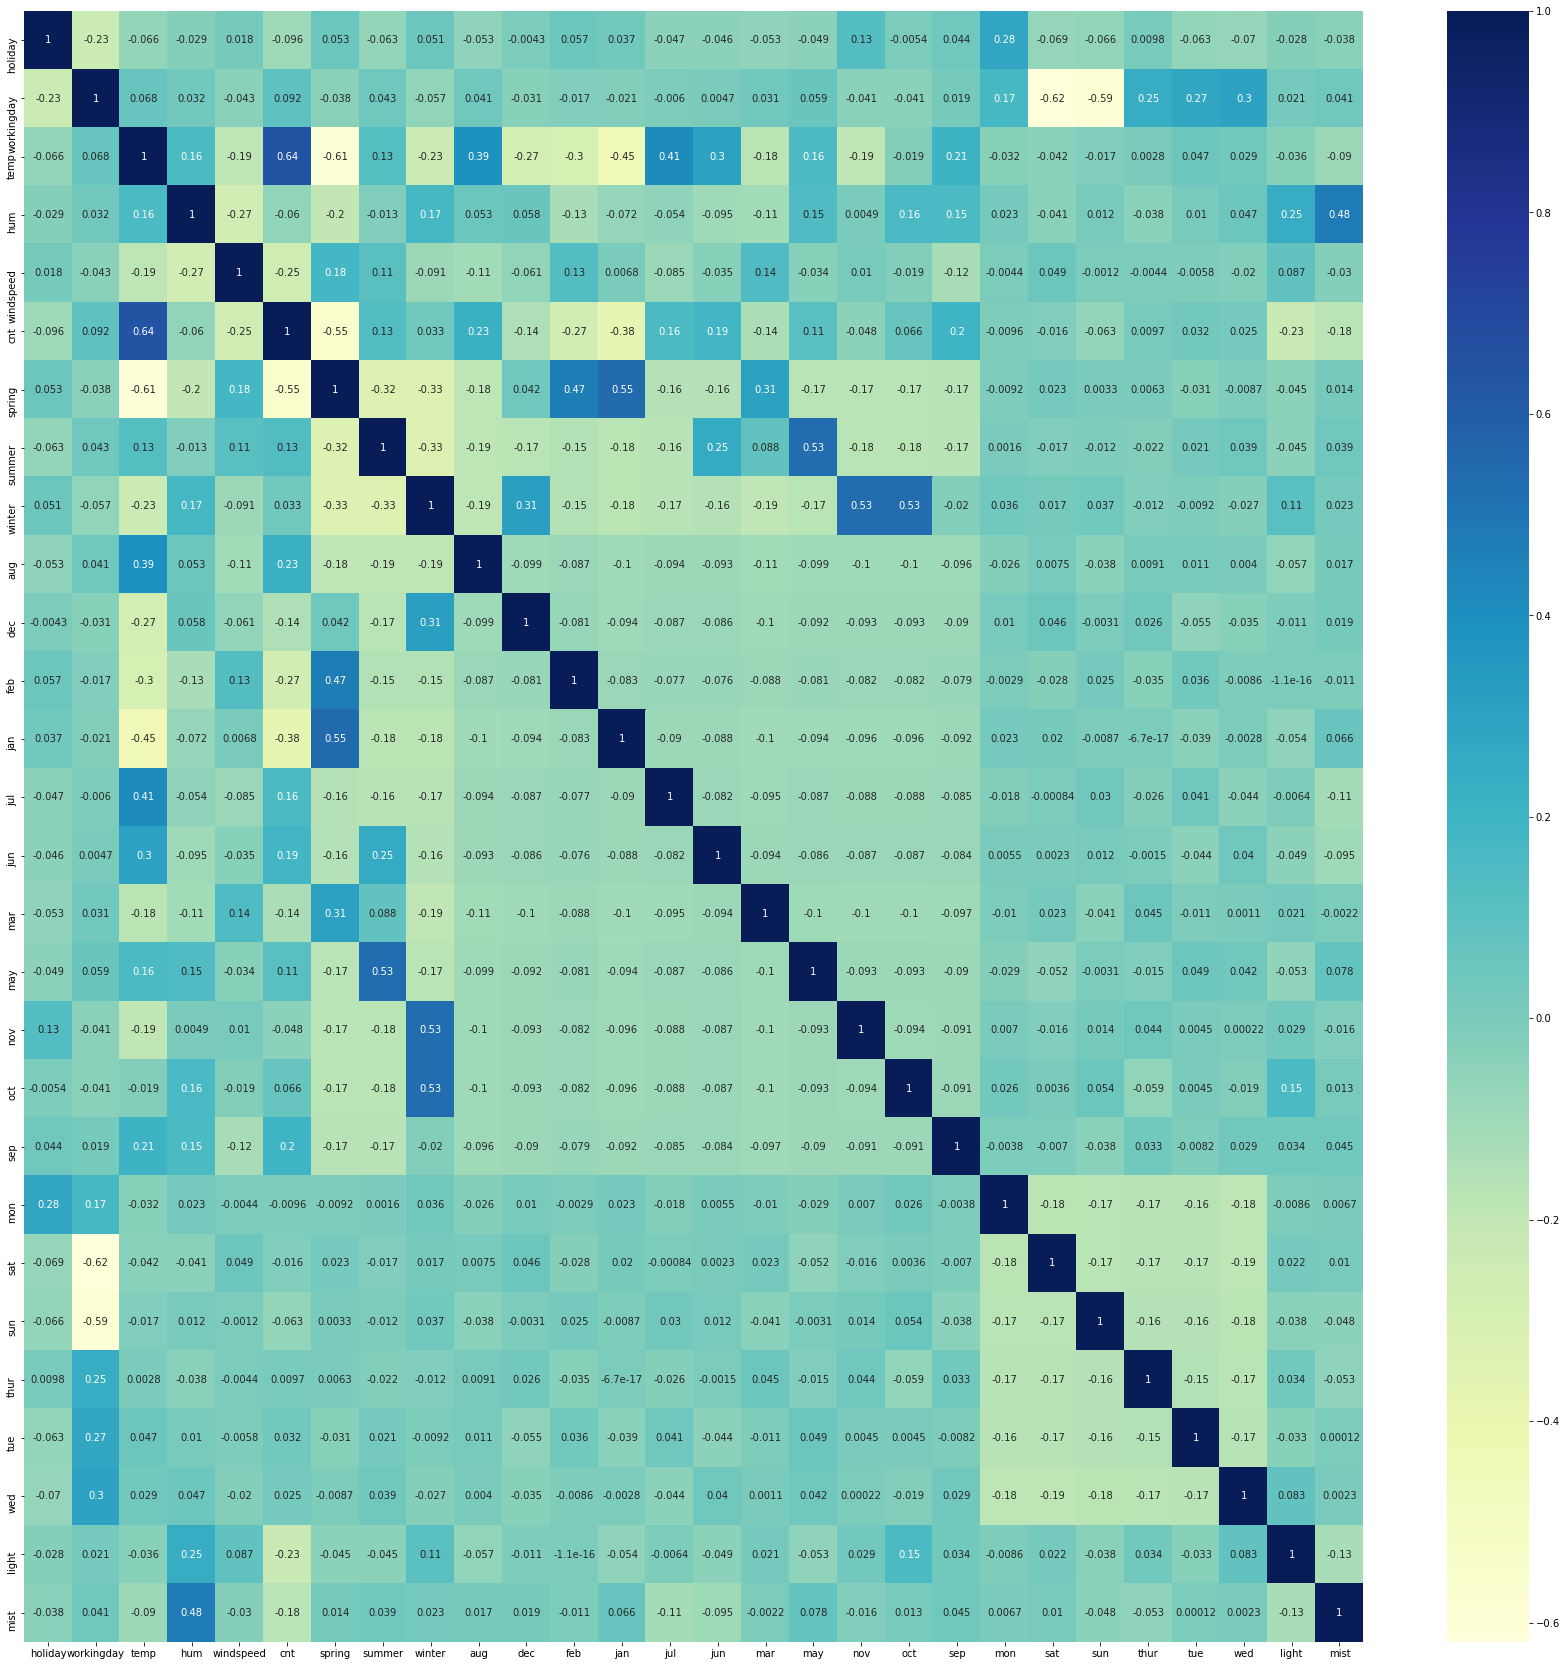

In [25]:
# Corelation of Data
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [26]:
df_train.corr().loc[:,['cnt']].sort_values(by='cnt')

cnt
spring     -0.548871
jan        -0.378173
feb        -0.270287
windspeed  -0.253794
light      -0.226598
mist       -0.175530
dec        -0.143598
mar        -0.137537
holiday    -0.095961
sun        -0.063385
hum        -0.059993
nov        -0.048130
sat        -0.016215
mon        -0.009552
thur        0.009710
wed         0.025216
tue         0.031883
winter      0.032636
oct         0.065692
workingday  0.092320
may         0.113027
summer      0.134343
jul         0.157812
jun         0.187821
sep         0.201327
aug         0.227229
temp        0.643517
cnt         1.000000

#### Takeayways:
1. temperature is higly corlated in positive
2. spring is highly corelated in negative.

In monts:
1. jan and feb has negative corelation.
2. sep anf aug has positive corelaiton.

In [27]:
### Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

## Building the linear regression model

In [28]:
X_train

yr  holiday  workingday      temp       hum  windspeed  spring  summer  \
653  1        0           1  0.509887  0.575354   0.300794       0       0   
576  1        0           1  0.815169  0.725633   0.264686       0       0   
426  1        0           0  0.442393  0.640189   0.255342       1       0   
728  1        0           0  0.245101  0.498067   0.663106       1       0   
482  1        0           0  0.395666  0.504508   0.188475       0       1   
..  ..      ...         ...       ...       ...        ...     ...     ...   
526  1        0           1  0.824514  0.605840   0.355596       0       1   
578  1        0           1  0.863973  0.679690   0.187140       0       0   
53   0        0           1  0.202618  0.435939   0.111379       1       0   
350  0        0           0  0.248216  0.577930   0.431816       0       0   
79   0        0           1  0.462664  0.759870   0.529881       0       1   

     winter  aug  ...  oct  sep  mon  sat  sun  thur  tue  wed  light  mist  
653       1    0  ...    1    0    0    0    0     0    1    0      0     0  
576       0    0  ...    0    0    0    0    0     0    1    0      0     0  
426       0    0  ...    0    0    0    1    0     0    0    0      0     1  
728       0    0  ...    0    0    0    0    1     0    0    0      0     0  
482       0    0  ...    0    0    0    1    0     0    0    0      0     1  
..      ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...   ...  
526       0    0  ...    0    0    1    0    0     0    0    0      0     1  
578       0    1  ...    0    0    0    0    0     1    0    0      0     0  
53        0    0  ...    0    0    0    0    0     0    0    1      0     0  
350       1    0  ...    0    0    0    1    0     0    0    0      0     1  
79        0    0  ...    0    0    1    0    0     0    0    0      0     1  

[510 rows x 28 columns]

### Perfroming RFE to get to top 15 features

In [29]:
#Performing RFE to get top 15 columns
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [30]:
#Columns list with Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 3),
 ('feb', False, 5),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thur', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('light', True, 1),
 ('mist', True, 1)]

In [31]:
#Top 15 features
rfe_selected_column = X_train.columns[rfe.support_]
rfe_selected_column

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'jan', 'jul', 'sep', 'sat', 'sun', 'light', 'mist'],
      dtype='object')

### Manual Feature Selection

In [32]:
# Creating training dataframe with RFE selected variables
X_train = X_train[rfe_selected_column].astype(float)

In [33]:
import statsmodels.api as sm
def getModel(df):
    # Add a constant
    X_train_lm = sm.add_constant(df)
    #Training model
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())
    return lr, X_train_lm

In [34]:
# Method to calculate VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [35]:
#Generating model
lr=getModel(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.03e-190
Time:                        18:09:58   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2503      0.025      9.865      0.0

In [36]:
#Geting VIF
cal_vif(X_train)

Features    VIF
2   workingday  41.60
11         sat  10.14
12         sun   9.82
3         temp   3.19
6       spring   2.72
1      holiday   2.58
4          hum   1.90
7       winter   1.81
14        mist   1.57
8          jan   1.55
9          jul   1.31
13       light   1.25
5    windspeed   1.19
10         sep   1.11
0           yr   1.04

### Takeaways

1. R squared and adjusted rsquared of the model is about .84.
2. P value of the model is veru less than .05
3. P value of holiday columns are higher than .05
4. workingday and sat have VIF more than 10.
5. sun - 9.82. - Need to inspect

Dropping holiday

In [37]:
#Removing holiday
X_train = X_train.drop('holiday', axis=1)

In [38]:
#Generating model
lr=getModel(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.03e-190
Time:                        18:09:58   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     495   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2443      0.040      6.120      0.0

In [39]:
#Geting VIF
cal_vif(X_train)

Features    VIF
3          hum  29.73
2         temp  18.10
1   workingday  17.04
10         sat   4.60
4    windspeed   4.55
11         sun   4.47
5       spring   3.11
13        mist   2.28
6       winter   2.18
0           yr   2.09
7          jan   1.68
8          jul   1.41
12       light   1.23
9          sep   1.21

### Takeaways

1. R squared and adjusted rsquared of the model is about .84.
2. P value of the model is veru less than .05
3. P value of all columns are less than .05
4. hum, workingday and temp have VIF more than 10.

Dropping hum

In [40]:
#Removing hum
X_train = X_train.drop('hum', axis=1)

In [41]:
#Generating model
lr=getModel(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.12e-188
Time:                        18:09:58   Log-Likelihood:                 506.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     496   BIC:                            -926.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1686      0.035      4.817      0.0

In [42]:
#Geting VIF
cal_vif(X_train)

Features    VIF
1   workingday  13.48
2         temp  12.76
3    windspeed   4.51
9          sat   3.85
10         sun   3.60
4       spring   2.85
0           yr   2.07
5       winter   1.79
6          jan   1.65
12        mist   1.58
7          jul   1.38
8          sep   1.20
11       light   1.09

### Takeaways

1. adjusted rsquared dropped little bit..
2. P value of the model is veru less than .05
3. P value of all columns are less than .05
4. workingday and temp have VIF more than 10.

Dropping workingday

In [43]:
#Removing workingday
X_train = X_train.drop('workingday', axis=1)

In [44]:
#Generating model
lr=getModel(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.99e-186
Time:                        18:09:58   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     497   BIC:                            -916.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2691      0.025     10.924      0.0

In [45]:
#Geting VIF
cal_vif(X_train)

Features   VIF
1        temp  4.75
2   windspeed  4.04
3      spring  2.26
0          yr  2.06
5         jan  1.60
11       mist  1.53
4      winter  1.41
6         jul  1.36
8         sat  1.22
7         sep  1.20
9         sun  1.20
10      light  1.08

### Takeaways

1. adjusted rsquared and r squared dropped little bit..
2. P value of the model is veru less than .05
3. P value of sat is greater than .05
4.  VIF of all columns less than 5.

Dropping sat

In [46]:
#Removing workingday
X_train = X_train.drop('sat', axis=1)

In [47]:
#Generating model
lr, X_train_lm=getModel(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.08e-187
Time:                        18:09:59   Log-Likelihood:                 497.93
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     498   BIC:                            -921.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2719      0.025     11.068      0.0

In [48]:
#Geting VIF
cal_vif(X_train)

Features   VIF
1        temp  4.69
2   windspeed  4.01
3      spring  2.25
0          yr  2.06
5         jan  1.60
10       mist  1.53
4      winter  1.40
6         jul  1.36
7         sep  1.20
8         sun  1.17
9       light  1.08

### Take aways:
    1. Final Model has 0.83 r-squared value and .80 adjusted r-squared value.

### Residual Analysis of the train data

In [49]:
#Predicted train data value
y_train_pred = lr.predict(X_train_lm)

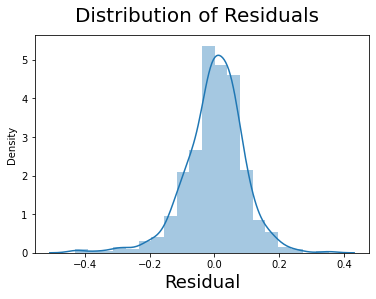

In [50]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Distribution of Residuals', fontsize = 20)            
plt.xlabel('Residual', fontsize = 18)
plt.show()

### Take- wayas 
1. Error terms are normally distributed with mean zero

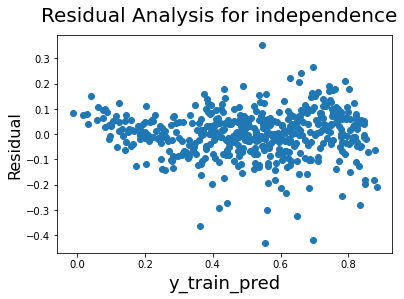

In [70]:
# Plotting y_train_pred and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train_pred,(y_train - y_train_pred))
fig.suptitle('Residual Analysis for independence', fontsize=20)              
plt.xlabel('y_train_pred', fontsize=18)                          
plt.ylabel('Residual', fontsize=16) 
plt.show()

### Take- wayas - 
1. Error terms are independent of each other

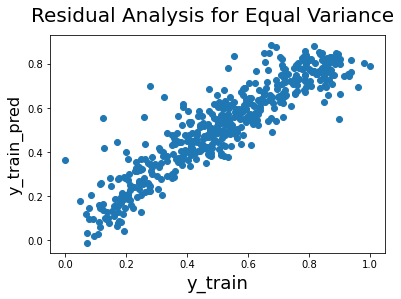

In [66]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.reg(y_train,y_train_pred)
fig.suptitle('Residual Analysis for Equal Variance', fontsize=20)              
plt.xlabel('y_train', fontsize=18)                          
plt.ylabel('y_train_pred', fontsize=16) 
plt.show()

### Take- wayas - 
1. Error terms have  constant variance (homoscedasticity)

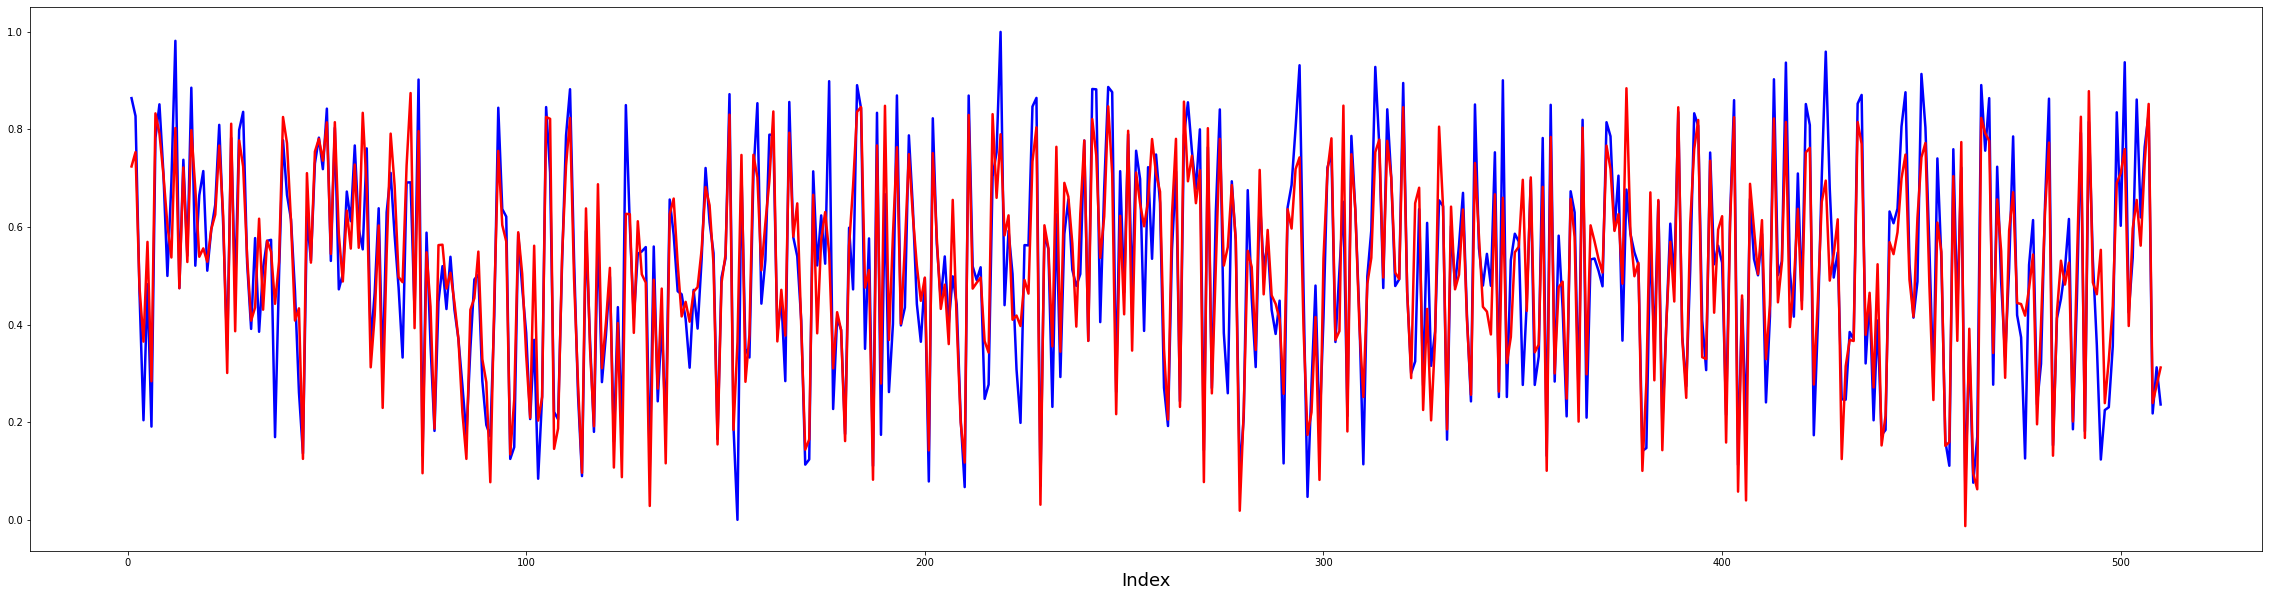

In [53]:
c = [i for i in range(1,len(y_train)+1,1)] # generating index
plt.figure(figsize = (40, 10))
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18)
plt.show()

### There is a very good overlap between predicted and actual value. Hence model has predicted very wll in training data set.

## Model Exaluation

In [54]:
### Scaling on test data
df_test[column_scale] = scaler.transform(df_test[column_scale])

In [55]:
### Dividing into X and Y sets for the model building
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
## Adding constant in test data set
X_test_lm = sm.add_constant(df_test).astype(float)

In [57]:
##Selecting the features used to create model in test data set.
X_test_lm = X_test_lm[X_train_lm.columns]

In [58]:
X_test_lm.describe()

const          yr        temp   windspeed      spring      winter  \
count  219.0  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     1.0    0.479452    0.558941    0.313350    0.255708    0.232877   
std      0.0    0.500722    0.233698    0.159947    0.437258    0.423633   
min      1.0    0.000000    0.046591   -0.042808    0.000000    0.000000   
25%      1.0    0.000000    0.354650    0.198517    0.000000    0.000000   
50%      1.0    0.000000    0.558691    0.299459    0.000000    0.000000   
75%      1.0    1.000000    0.759096    0.403048    1.000000    0.000000   
max      1.0    1.000000    0.984424    0.807474    1.000000    1.000000   

              jan         jul         sep         sun       light        mist  
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  
mean     0.077626    0.105023    0.086758    0.146119    0.027397    0.319635  
std      0.268194    0.307285    0.282125    0.354034    0.163612    0.467403  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

In [59]:
#Predicted test data value
y_test_pred = lr.predict(X_test_lm)

In [60]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8050405644499643

### r squred on test data is .80 and train data is .83. Hence, model is able to generalize the test data as well.

### Residual Analysis of test data

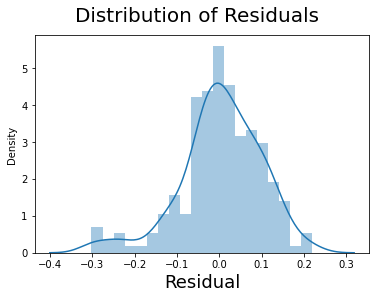

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Distribution of Residuals', fontsize = 20)            
plt.xlabel('Residual', fontsize = 18)
plt.show()

### Takeaways - 
1. Error terms are almost normally distributed with mean zero.

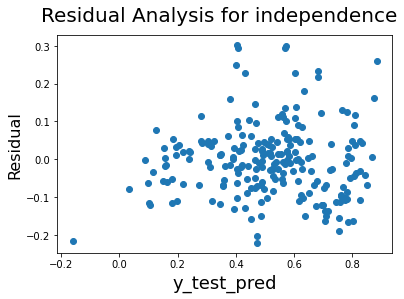

In [62]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_pred,(y_test_pred-y_test))
fig.suptitle('Residual Analysis for independence', fontsize=20)              
plt.xlabel('y_test_pred', fontsize=18)                          
plt.ylabel('Residual', fontsize=16) 
plt.show()

### Takeaways - 
1. Error terms are independent of each other

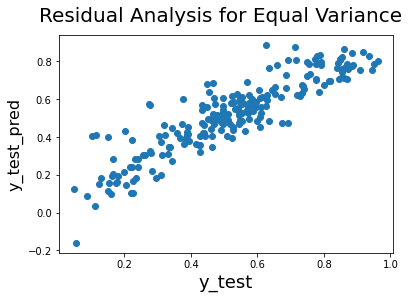

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Residual Analysis for Equal Variance', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16) 
plt.show()

### Take- wayas - 
1. Error terms have  constant variance (homoscedasticity)

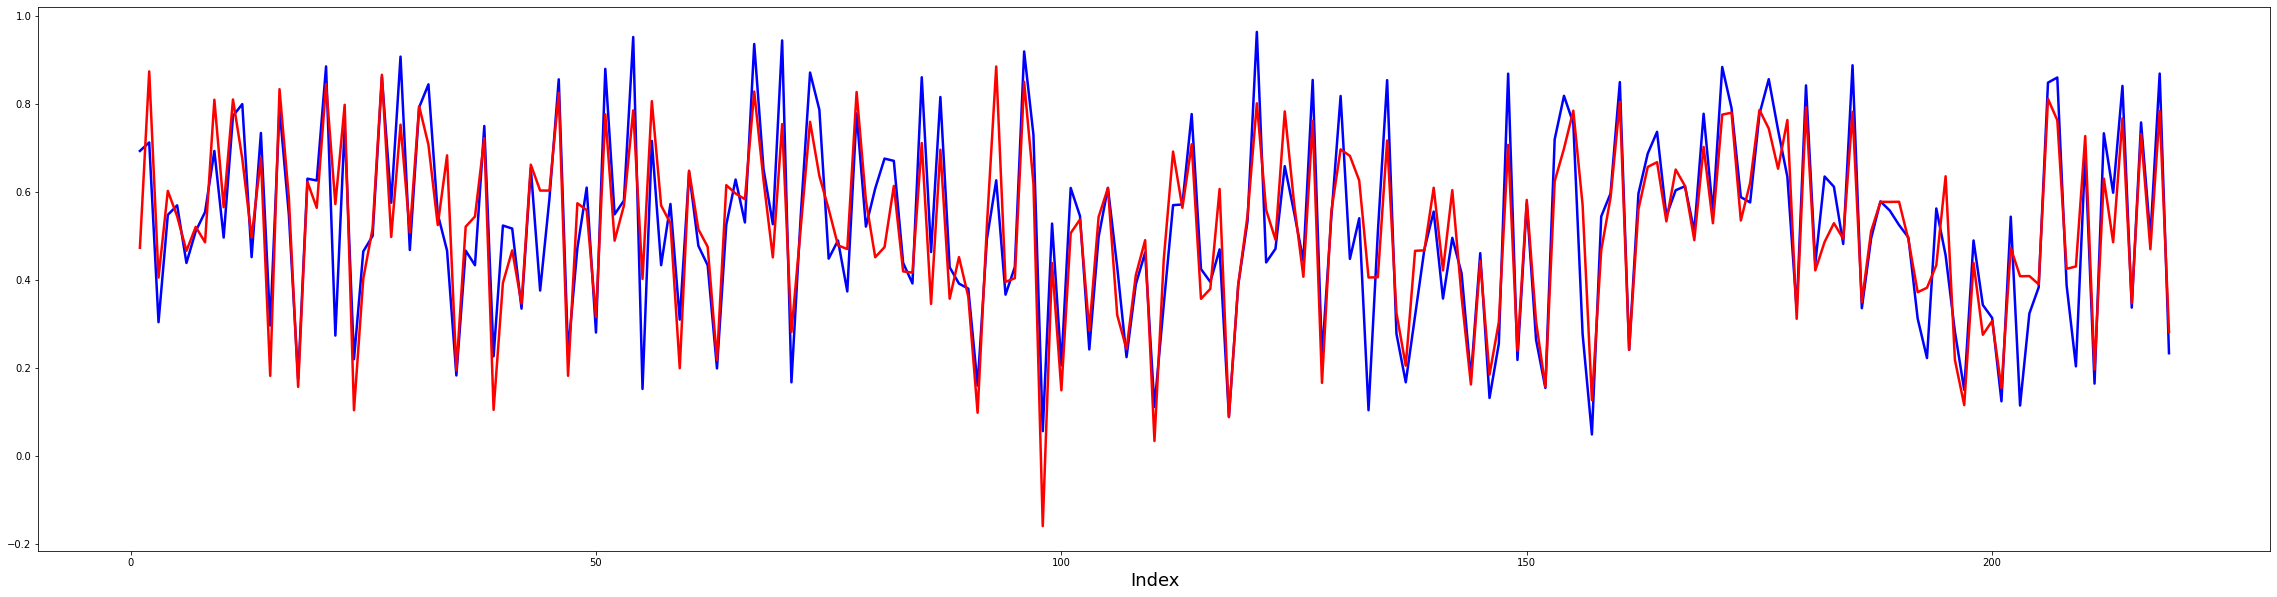

In [63]:
c = [i for i in range(1,len(y_test)+1,1)] # generating index
plt.figure(figsize = (40, 10))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18)
plt.show()

### There is a very good overlap between predicted and actual value. Hence model has predicted very well in test data set.

## Conclusion

In [64]:
coeffecients = pd.DataFrame(lr.params,X_train_lm.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by='Coeffecient')

Coeffecient
light        -0.288184
windspeed    -0.150120
spring       -0.103373
mist         -0.080136
jul          -0.065951
sun          -0.044848
jan          -0.044495
winter        0.041960
sep           0.053563
yr            0.235211
const         0.271875
temp          0.432172

### Interpreting the coefficients:

temperature
- Holding all other features fixed, 1 unit increase in **temperature** leads to **.43 unit increase of demand**.

windspeed
- Holding all other features fixed, 1 unit increase in **windspeed** leads **.15 unit decrease of demand**.

year
- Holding all other features fixed, demand is **.23 units more in 2019 than 2018.**

weathersit
- Holding all other features fixed, 1 unit increase in **light weather - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (as compared to clear weather)** leads to **.28 unit decrease of demand**.

- Holding all other features fixed, 1 unit increase in **mist weather - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (as compared to clear weather)** leads to **.08 unit decrease of demand**.


Season

- Holding all other features fixed, demand is **.10 units less in spring season than in fall season.**
- Holding all other features fixed, demand is **.04 units more in winter season than in fall season.**


weekday

- Holding all other features fixed, demand is **.04 units less on sunday than friday.**

Month

- Holding all other features fixed, demand is **.06 units less in july than april.**
- Holding all other features fixed, demand is **.04 units less in jan than april.**
- Holding all other features fixed, demand is **.05 units more in sep than april.**
